In [1]:
from keras.models import Sequential # To initialise the nn as a sequence of layers
from keras.layers import Convolution2D # To make the convolution layer for 2D images
from keras.layers import MaxPooling2D # 
from keras.layers import GlobalAveragePooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import CSVLogger
from keras.optimizers import RMSprop
from keras.layers import BatchNormalization
from keras.optimizers import Adam
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

/home/saquib/anaconda3/envs/tensorflow/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
model = load_model('7_Encoding_with_activation.h5')

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


/home/saquib/anaconda3/envs/tensorflow/lib/python3.5/site-packages/keras/models.py:287: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [3]:
model.compile(optimizer = 'adadelta', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
convo1 (Conv2D)              (None, 112, 112, 32)      160       
_________________________________________________________________
convo2 (Conv2D)              (None, 110, 110, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 55, 55, 64)        0         
_________________________________________________________________
convo3 (Conv2D)              (None, 53, 53, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 64)        256       
_________________________________________________________________
global_average_pooling2d_1 ( (None, 64)                0         
__________

In [6]:
W = model.get_weights()

In [7]:
import numpy as np

In [8]:
W = np.array(W)

In [9]:
W.shape

(12,)

In [10]:
W[0].shape

(2, 2, 1, 32)

In [11]:
lay = []
for l in model.layers:
    lay.append(l.name)
    print(l.weights)

[<tf.Variable 'convo1/kernel:0' shape=(2, 2, 1, 32) dtype=float32_ref>, <tf.Variable 'convo1/bias:0' shape=(32,) dtype=float32_ref>]
[<tf.Variable 'convo2/kernel:0' shape=(3, 3, 32, 64) dtype=float32_ref>, <tf.Variable 'convo2/bias:0' shape=(64,) dtype=float32_ref>]
[]
[<tf.Variable 'convo3/kernel:0' shape=(3, 3, 64, 64) dtype=float32_ref>, <tf.Variable 'convo3/bias:0' shape=(64,) dtype=float32_ref>]
[]
[<tf.Variable 'batch_normalization_1/gamma:0' shape=(64,) dtype=float32_ref>, <tf.Variable 'batch_normalization_1/beta:0' shape=(64,) dtype=float32_ref>, <tf.Variable 'batch_normalization_1/moving_mean:0' shape=(64,) dtype=float32_ref>, <tf.Variable 'batch_normalization_1/moving_variance:0' shape=(64,) dtype=float32_ref>]
[]
[]
[<tf.Variable 'dense_1/kernel:0' shape=(64, 20) dtype=float32_ref>, <tf.Variable 'dense_1/bias:0' shape=(20,) dtype=float32_ref>]


In [12]:
lay

['convo1',
 'convo2',
 'max_pooling2d_1',
 'convo3',
 'max_pooling2d_2',
 'batch_normalization_1',
 'global_average_pooling2d_1',
 'dropout_1',
 'dense_1']

In [13]:
i = 0
for w in W:
    print(i,'-->{}'.format(w.shape))
    i += 1

0 -->(2, 2, 1, 32)
1 -->(32,)
2 -->(3, 3, 32, 64)
3 -->(64,)
4 -->(3, 3, 64, 64)
5 -->(64,)
6 -->(64,)
7 -->(64,)
8 -->(64,)
9 -->(64,)
10 -->(64, 20)
11 -->(20,)


In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
import cv2

In [16]:
img = cv2.imread('F01_phrases02_01.jpg',0)

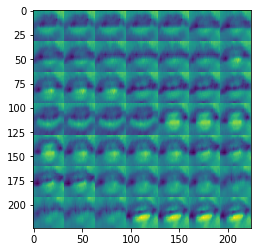

In [17]:
plt.imshow(img)

In [18]:
layers = model.layers 

In [19]:
layers

## Visualize the weights and the respective output

In [20]:
from keras.models import Model

In [21]:
import math

In [34]:
def plot_conv_weights(weights, input_channel=0):
    # Get the lowest and highest values for the weights.
    # This is used to correct the colour intensity across
    # the images so they can be compared with each other.
    w_min = np.min(weights)
    w_max = np.max(weights)

    # Number of filters used in the conv. layer.
    num_filters = weights.shape[3]

    # Number of grids to plot.
    # Rounded-up, square-root of the number of filters.
    num_grids = math.ceil(math.sqrt(num_filters))
    
    # Create figure with a grid of sub-plots.
    fig, axes = plt.subplots(num_grids, num_grids)

    # Plot all the filter-weights.
    for i, ax in enumerate(axes.flat):
        # Only plot the valid filter-weights.
        if i<num_filters:
            # Get the weights for the i'th filter of the input channel.
            # See new_conv_layer() for details on the format
            # of this 4-dim tensor.
            img = weights[:, :, input_channel, i]

            # Plot image.
            ax.imshow(img, vmin=w_min, vmax=w_max,
                      interpolation='nearest', cmap='seismic')
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [24]:
weights_convo1 = layers[0].get_weights()[0]
weights_convo1.shape

(2, 2, 1, 32)

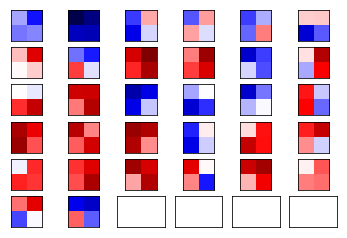

In [33]:
plot_conv_weights(weights=weights_convo1, input_channel=0)

In [36]:
weights_convo2 = layers[1].get_weights()[0]
weights_convo2.shape

(3, 3, 32, 64)

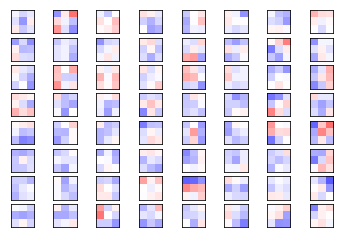

In [37]:
plot_conv_weights(weights=weights_convo2, input_channel=0)

### Helper-function for plotting the output of a convolutional layer

In [39]:
def plot_conv_output(values):
    # Number of filters used in the conv. layer.
    num_filters = values.shape[3]

    # Number of grids to plot.
    # Rounded-up, square-root of the number of filters.
    num_grids = math.ceil(math.sqrt(num_filters))
    
    # Create figure with a grid of sub-plots.
    fig, axes = plt.subplots(num_grids, num_grids)

    # Plot the output images of all the filters.
    for i, ax in enumerate(axes.flat):
        # Only plot the images for valid filters.
        if i<num_filters:
            # Get the output image of using the i'th filter.
            img = values[0, :, :, i]

            # Plot image.
            ax.imshow(img, interpolation='nearest', cmap='binary')
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [40]:
from keras import backend as K

In [41]:
img = np.reshape(img,(1,224,224,1))

In [42]:
img.shape

(1, 224, 224, 1)

In [43]:
output_conv1 = K.function(inputs= [K.learning_phase()+model.inputs],
                          outputs=[layers[0].output])

In [44]:
layer_output1 = output_conv1([0+img])
layer_output1[0].shape

(1, 112, 112, 32)

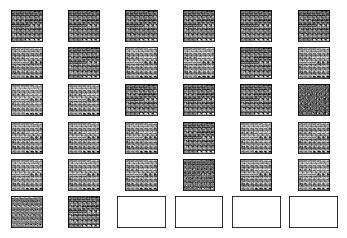

In [45]:
plot_conv_output(layer_output1[0])

In [48]:
output_conv2 = K.function(inputs=model.inputs,
                          outputs=[layers[1].output])
layer_output2 = output_conv2([img])

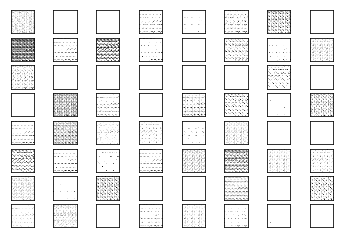

In [49]:
plot_conv_output(layer_output2[0])

In [50]:
output_conv3 = K.function(inputs=model.inputs,
                          outputs=[layers[2].output])
layer_output3 = output_conv3([img])

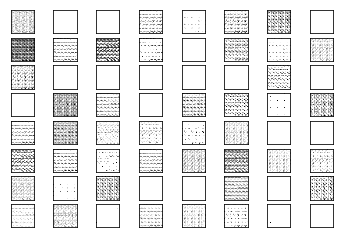

In [51]:
plot_conv_output(layer_output3[0])

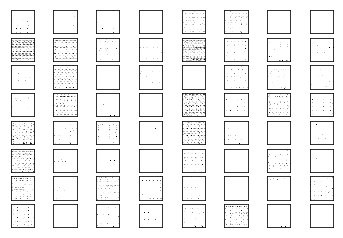

In [52]:
output_conv4 = K.function(inputs=model.inputs,
                          outputs=[layers[3].output])
layer_output4 = output_conv4([img])
plot_conv_output(layer_output4[0])

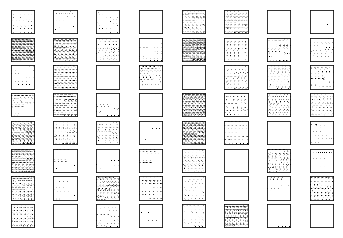

In [53]:
output_conv5 = K.function(inputs=model.inputs,
                          outputs=[layers[4].output])
layer_output5 = output_conv5([img])
plot_conv_output(layer_output5[0])